In [1]:
import numpy
from matplotlib import pyplot
import math
%matplotlib inline

In [2]:
N=50 
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x=numpy.linspace(x_start, x_end, N)
y=numpy.linspace(y_start, y_end, N)
X, Y = numpy.meshgrid(x, y)

kappa=1.0
x_doublet, y_doublet = 0.0, 0.0

In [3]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    u=(-strength / (2*math.pi)*((X-xd)**2 - (Y-yd)**2)/\
       ((X-xd)**2 + (Y-yd)**2)**2)
    v=(-strength / (2*math.pi)*2*(X-xd)*(Y-yd) /\
      ((X-xd)**2 + (Y-yd)**2)**2)
    return u, v

In [4]:
def get_stream_function_doublet(strength, xd, yd, X, Y):
    psi = -strength / (2*math.pi) * (Y-yd) / ((X-xd)**2 +\
                                             (Y-yd)**2)
    return psi

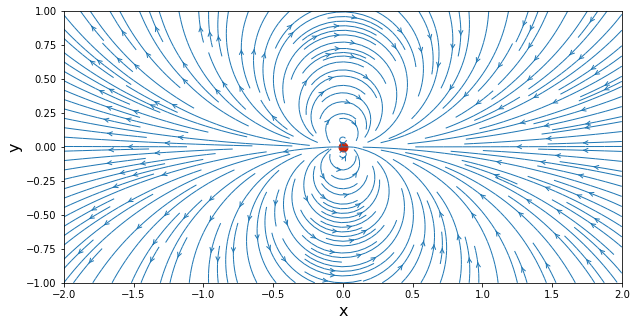

In [5]:
# compute the velocity feild on the mesh grid
u_doublet, v_doublet = get_velocity_doublet(kappa, x_doublet, y_doublet, X, Y)
psi_doublet = get_stream_function_doublet(kappa, x_doublet, y_doublet, X, Y)

# plot the streamlines
width=10
height=(y_end-y_start)/(x_end-x_start)*width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_doublet, v_doublet, 
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o');


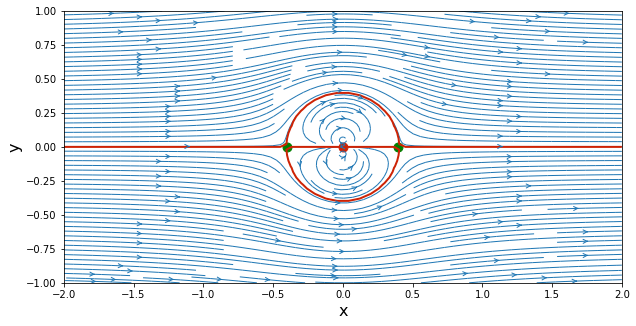

In [6]:
u_inf = 1.0

u_freestream = u_inf*numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

psi_freestream = u_inf *Y

# use the superposition principle
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream +psi_doublet

# plot the streamlines
width=10.0 
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

# calculate the stagnation points 
x_stagn1, y_stagn1 = +math.sqrt(kappa / (2*math.pi*u_inf)), 0.0
x_stagn2, y_stagn2 = -math.sqrt(kappa / (2*math.pi*u_inf)), 0.0

# show the stagnation points
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color='g', s=80, marker='o');

Challenge:

What is the radius of the circular cylinder created when a doublet of strength K is added to a uniform flow in the x-direction. 

Challenge:
You have the streamfunction of the doublet in cylindrical coordinates above. Add the streamfunction of the free stream in those coordinates, and study it. You will see that ψ=0ψ=0 at r=ar=a for all values of θθ. The line ψ=0ψ=0 represents the circular cylinder of radius aa. Now write the velocity components in cylindrical coordinates, find the speed of the flow at the surface. What does this tell you?

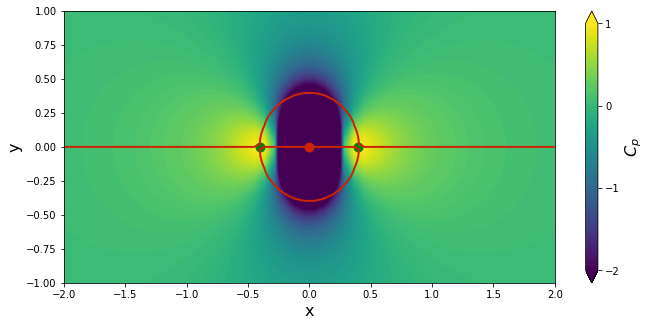

In [8]:
# Compute the pressure coefficient
cp = 1.0 - (u**2 + v**2) / u_inf**2

# plot the pressure coefficient field
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
pyplot.figure(figsize=(1.1 * width, height))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
contf = pyplot.contourf(X, Y, cp,
                        levels=numpy.linspace(-2.0, 1.0, 100), extend='both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter(x_doublet, y_doublet,
               color='#CD2305', s=80, marker='o')
pyplot.contour(X,Y,psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
pyplot.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color='g', s=80, marker='o');

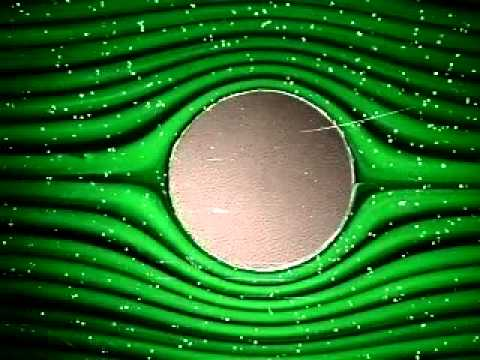

In [9]:
from IPython.display import YouTubeVideo
YouTubeVideo('Ekd8czwELOc')